# 🛒 Walmart Sales Forecasting - EDA

## 📌 Business Problem

Walmart, one of the largest retail chains in the world, operates 45 stores across various regions. Each store comprises multiple departments, and this project focuses on forecasting **weekly sales at the department level** for each store.

The challenge includes accounting for **seasonal effects**, **regional economics**, and **promotional markdowns**, particularly around major U.S. holidays like the **Super Bowl**, **Labor Day**, **Thanksgiving**, and **Christmas**. These holidays are known to heavily influence sales patterns, and the weeks surrounding them are **weighted 5x higher** in the model evaluation.



---

## 📂 Datasets Description
| Column         | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| `Store`        | Unique identifier for each store                                            |
| `Dept`         | Department number within the store                                          |
| `Date`         | Week of the sale (`YYYY-MM-DD` format)                                      |
| `IsHoliday`    | Whether the week includes a holiday (True/False)                            |
| `Weekly_Sales` | Cleaned weekly sales figures                                                |
| `Holiday_Flag` | Holiday indicator  (0 or 1)                                                 |  
| `Temperature`  | Average temperature during the week                                         |
| `Fuel_Price`   | Fuel price in the store's region                                            |
| `CPI`          | Consumer Price Index                                                        |
| `Unemployment` | Unemployment rate                                                           |
| `MarkDown1-5`  | Promotional markdown values                                                 |
| `Type`         | Store type (A, B, or C)                                                     |
| `Size`         | Size of the store in square feet                                            |


---

## 🗓️ Key Holiday Weeks

- **Super Bowl**: 12-Feb-2010, 11-Feb-2011, 10-Feb-2012, 8-Feb-2013  
- **Labor Day**: 10-Sep-2010, 9-Sep-2011, 7-Sep-2012, 6-Sep-2013  
- **Thanksgiving**: 26-Nov-2010, 25-Nov-2011, 23-Nov-2012, 29-Nov-2013  
- **Christmas**: 31-Dec-2010, 30-Dec-2011, 28-Dec-2012, 27-Dec-2013  

---







# 🔍 Data Overview & Exploration

In [2]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv('E:/IBM Data Scientiest/Graduation Project/MileStone1/Uncleaned DataSet/walmart.csv')

In [4]:
dataset.shape

(421570, 17)

In [5]:
dataset.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Weekly_Sales', 'Holiday_Flag',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Type', 'Size'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  bool   
 4   Weekly_Sales  421570 non-null  float64
 5   Holiday_Flag  421570 non-null  int64  
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   CPI           421570 non-null  float64
 9   Unemployment  421570 non-null  float64
 10  MarkDown1     150681 non-null  float64
 11  MarkDown2     111248 non-null  float64
 12  MarkDown3     137091 non-null  float64
 13  MarkDown4     134967 non-null  float64
 14  MarkDown5     151432 non-null  float64
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(4), object(2)
mem

*📝 *Conclusion: There is no problem with Data Types found in dataset except for **Date Column** we can change it to **Date Data type** and Engineer time-based features (e.g., day of the week, month, seasonality, promotional periods).*

In [7]:
dataset.duplicated().sum()#checking for duplicates

np.int64(0)

In [8]:
dataset.isnull().sum()#checking for null values

Store                0
Dept                 0
Date                 0
IsHoliday            0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment         0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
Type                 0
Size                 0
dtype: int64

In [9]:
dataset.isnull().mean()#checking for null values in percentage

Store           0.000000
Dept            0.000000
Date            0.000000
IsHoliday       0.000000
Weekly_Sales    0.000000
Holiday_Flag    0.000000
Temperature     0.000000
Fuel_Price      0.000000
CPI             0.000000
Unemployment    0.000000
MarkDown1       0.642572
MarkDown2       0.736110
MarkDown3       0.674808
MarkDown4       0.679847
MarkDown5       0.640790
Type            0.000000
Size            0.000000
dtype: float64

In [10]:
dataset.describe(include=np.number)#Getting the summary of numerical columns

,Store,Dept,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size
count,421570.000000,421570.000000,4.215700e+05,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000
mean,22.200546,44.260317,1.095707e+06,0.070358,60.090059,3.361027,171.201947,7.960289,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,136727.915739
std,12.785297,30.492054,5.613908e+05,0.255750,18.447931,0.458515,39.159276,1.863296,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,60980.583328
min,1.000000,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.270000,-265.760000,-29.100000,0.220000,135.160000,34875.000000
25%,11.000000,18.000000,6.066715e+05,0.000000,46.680000,2.933000,132.022667,6.891000,2240.270000,41.600000,5.080000,504.220000,1878.440000,93638.000000
50%,22.000000,37.000000,1.010326e+06,0.000000,62.090000,3.452000,182.318780,7.866000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,140167.000000
75%,33.000000,74.000000,1.463502e+06,0.000000,74.280000,3.738000,212.416993,8.572000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,202505.000000
max,45.000000,99.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,219622.000000


In [11]:
dataset['Type'].describe()#Getting the summary of Type column

count     421570
unique         3
top            A
freq      215478
Name: Type, dtype: object

In [12]:
#getting the number of unique values in Store Column
dataset['Store'].nunique()

45

In [13]:
#getting the number of unique values in Department Column
dataset['Dept'].nunique()

81

In [14]:
#getting the number of Holiday weeks
dataset['Holiday_Flag'].value_counts()

Holiday_Flag
0    391909
1     29661
Name: count, dtype: int64

📝 *Conclusion: as '0' indicates no Holiday ,'1' indicates Holiday so number of holidays is 29,661*

In [15]:
print(f"the maximum value of the Date column is {dataset['Date'].max()} and the minimum value is {dataset['Date'].min()}")

the maximum value of the Date column is 2012-10-26 and the minimum value is 2010-02-05


# 📊 Data Overview and Exploration Summary

The `walmart.csv` dataset provides a comprehensive view of Walmart's weekly sales activity across various stores and departments.

## 🧾 Findings

- **Time Range**: 2010-02-05 to 2012-10-26  
- **Total Records**: 421,570  
- **Unique Stores**: 45  
- **Unique Departments**: 81  
- **Holiday Weeks**: 29,661  

## ⚠️ Missing Values

The following columns contain missing values:

- **MarkDown1**: 270,889 missing  
- **MarkDown2**: 310,322 missing  
- **MarkDown3**: 284,479 missing  
- **MarkDown4**: 286,603 missing  
- **MarkDown5**: 270,138 missing  

## 🧠 Key Columns and Purpose

- **Sales Metrics**: `Weekly_Sales`, used for forecasting and trend analysis.  
- **Holidays**: `IsHoliday`, `Holiday_Flag` help model holiday-related effects.  
- **Economic Indicators**: `CPI`, `Unemployment`, `Fuel_Price`, and `Temperature`.  
- **Promotions**: `MarkDown1` to `MarkDown5` represent various types of promotional markdowns.  
- **Store Info**: `Type`, `Size` describe the structure and scale of stores.  

## 🔍 Use Cases

- **Sales Forecasting**  
- **Holiday Sales Impact Analysis**  
- **Effectiveness of Promotions**  
- **Comparative Store Performance**


---

# 🔧 Feature Extraction

In [16]:
#converting the date column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])
#checking the data types of the columns
dataset.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
Type                    object
Size                     int64
dtype: object

In [17]:
#Engineering Time-Related Features
dataset["Month"] = dataset["Date"].dt.month
dataset["Year"] = dataset["Date"].dt.year
dataset["WeekOfYear"] = dataset["Date"].dt.isocalendar().week
dataset["Quarter"] = dataset["Date"].dt.quarter

# Define season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

dataset["Season"] = dataset["Month"].apply(get_season)

promo_dates = [
    "2010-02-12", "2011-02-11", "2012-02-10", "2013-02-08",  # Super Bowl
    "2010-09-10", "2011-09-09", "2012-09-07", "2013-09-06",  # Labor Day
    "2010-11-26", "2011-11-25", "2012-11-23", "2013-11-29",  # Thanksgiving
    "2010-12-31", "2011-12-30", "2012-12-28", "2013-12-27"   # Christmas
]

# Convert promo_dates to datetime
promo_dates = pd.to_datetime(promo_dates)

# Flag promotional weeks
dataset["IsPromoWeek"] = dataset["Date"].isin(promo_dates)


In [18]:
dataset.head()

,Store,Dept,Date,IsHoliday,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,...,MarkDown4,MarkDown5,Type,Size,Month,Year,WeekOfYear,Quarter,Season,IsPromoWeek
0,1,1,2010-02-05,False,1643690.90,0,42.31,2.572,211.096358,8.106,...,NaN,NaN,A,151315,2,2010,5,1,Winter,False
1,1,1,2010-02-12,True,1641957.44,1,38.51,2.548,211.242170,8.106,...,NaN,NaN,A,151315,2,2010,6,1,Winter,True
2,1,1,2010-02-19,False,1611968.17,0,39.93,2.514,211.289143,8.106,...,NaN,NaN,A,151315,2,2010,7,1,Winter,False
3,1,1,2010-02-26,False,1409727.59,0,46.63,2.561,211.319643,8.106,...,NaN,NaN,A,151315,2,2010,8,1,Winter,False
4,1,1,2010-03-05,False,1554806.68,0,46.50,2.625,211.350143,8.106,...,NaN,NaN,A,151315,3,2010,9,1,Spring,False


---

# 🔗 Understanding Correlation Between Columns

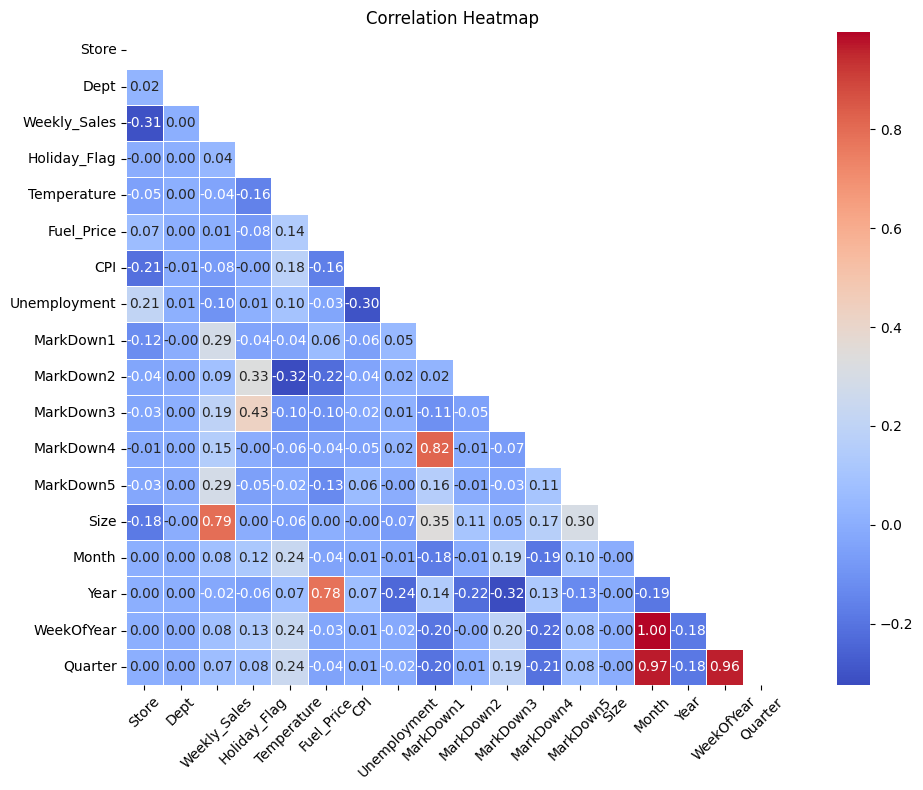

In [19]:
numeric_df = dataset.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 🔍 Correlation Heatmap Summary

The correlation heatmap provides insight into the relationships between numeric features in the dataset:

#### 📈 Key Observations:
- **Store Size** shows a **strong positive correlation** with `Weekly_Sales` (`r = 0.79`), suggesting larger stores tend to have higher sales.
- Among markdown features:
  - `MarkDown3` has the **highest correlation** with `Weekly_Sales` (`r = 0.43`)
  - `MarkDown2` and `MarkDown1` also show moderate correlation (`r = 0.33` and `r = 0.29`, respectively)
- `MarkDown1` and `MarkDown4` are **highly correlated** with each other (`r = 0.82`), indicating potential redundancy.
- Temporal features like `Month`, `Quarter`, and `WeekOfYear` show **low correlation** with sales, but may still be useful for capturing trends and seasonality.
- Economic indicators (`Fuel_Price`, `CPI`, `Unemployment`) have **weak or negative correlations** with sales.

#### ✅ Insights:
- Promotions (`MarkDown1–5`) appear relevant, particularly `MarkDown3`.
- Due to high inter-correlation between markdowns, we may consider:
  - Creating a new feature like `TotalMarkDown` (sum of all markdowns), or
  - Applying dimensionality reduction (e.g., PCA) to compress these into fewer features.




---

# 🛠️ Handling Missing Values

In [20]:
dataset.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True)

In [21]:
dataset.isnull().sum()#checking for null values again

Store           0
Dept            0
Date            0
IsHoliday       0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
Month           0
Year            0
WeekOfYear      0
Quarter         0
Season          0
IsPromoWeek     0
dtype: int64

### 🧼 Summary of Handling Missing Values in `MarkDown` Columns

The `MarkDown1–5` columns represent promotional discounts at different times. These columns contain a large number of missing values.





### ✅  Strategy
Given the high percentage of missing data in the MarkDown1 to MarkDown5 columns, and considering the data's importance in promotional analysis, the best solution is to drop these columns entirely. This is because the missing data exceeds the acceptable threshold and would likely lead to unreliable analysis if imputed or filled with arbitrary values.



### 🔍 Outcome: There is no remains of any missing values 


---

# 🔎Outliers Detection and Handling

In [22]:
for col in ['Unemployment', 'CPI', 'Fuel_Price', 'Temperature', 'Size','Weekly_Sales']:
    neg_count = (dataset[col] < 0).sum()
    print(f"{col}: Negative values = {neg_count}")

Unemployment: Negative values = 0
CPI: Negative values = 0
Fuel_Price: Negative values = 0
Temperature: Negative values = 69
Size: Negative values = 0
Weekly_Sales: Negative values = 0


In [23]:
dataset.describe(include=np.number)

,Store,Dept,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Size,Month,Year,WeekOfYear,Quarter
count,421570.000000,421570.000000,4.215700e+05,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.000000
mean,22.200546,44.260317,1.095707e+06,0.070358,60.090059,3.361027,171.201947,7.960289,136727.915739,6.449510,2010.968591,25.826762,2.482767
std,12.785297,30.492054,5.613908e+05,0.255750,18.447931,0.458515,39.159276,1.863296,60980.583328,3.243217,0.796876,14.151887,1.071341
min,1.000000,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,34875.000000,1.000000,2010.000000,1.0,1.000000
25%,11.000000,18.000000,6.066715e+05,0.000000,46.680000,2.933000,132.022667,6.891000,93638.000000,4.000000,2010.000000,14.0,2.000000
50%,22.000000,37.000000,1.010326e+06,0.000000,62.090000,3.452000,182.318780,7.866000,140167.000000,6.000000,2011.000000,26.0,2.000000
75%,33.000000,74.000000,1.463502e+06,0.000000,74.280000,3.738000,212.416993,8.572000,202505.000000,9.000000,2012.000000,38.0,3.000000
max,45.000000,99.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,219622.000000,12.000000,2012.000000,52.0,4.000000


In [24]:
def check_outliers(data, col, q1=0.25, q3=0.75):
    Q1 = data[col].quantile(q1)
    Q3 = data[col].quantile(q3)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index.tolist()
    return outlier_indices


In [25]:
for col in ['Unemployment', 'CPI', 'Fuel_Price', 'Temperature', 'Size','Weekly_Sales']:
    outlier_indices = check_outliers(dataset, col)
    print(f"Outliers in {col}: {len(outlier_indices)}")


Outliers in Unemployment: 32114
Outliers in CPI: 0
Outliers in Fuel_Price: 0
Outliers in Temperature: 69
Outliers in Size: 0
Outliers in Weekly_Sales: 2179


# Outliers Before handling

# 📊Histogram Distribution

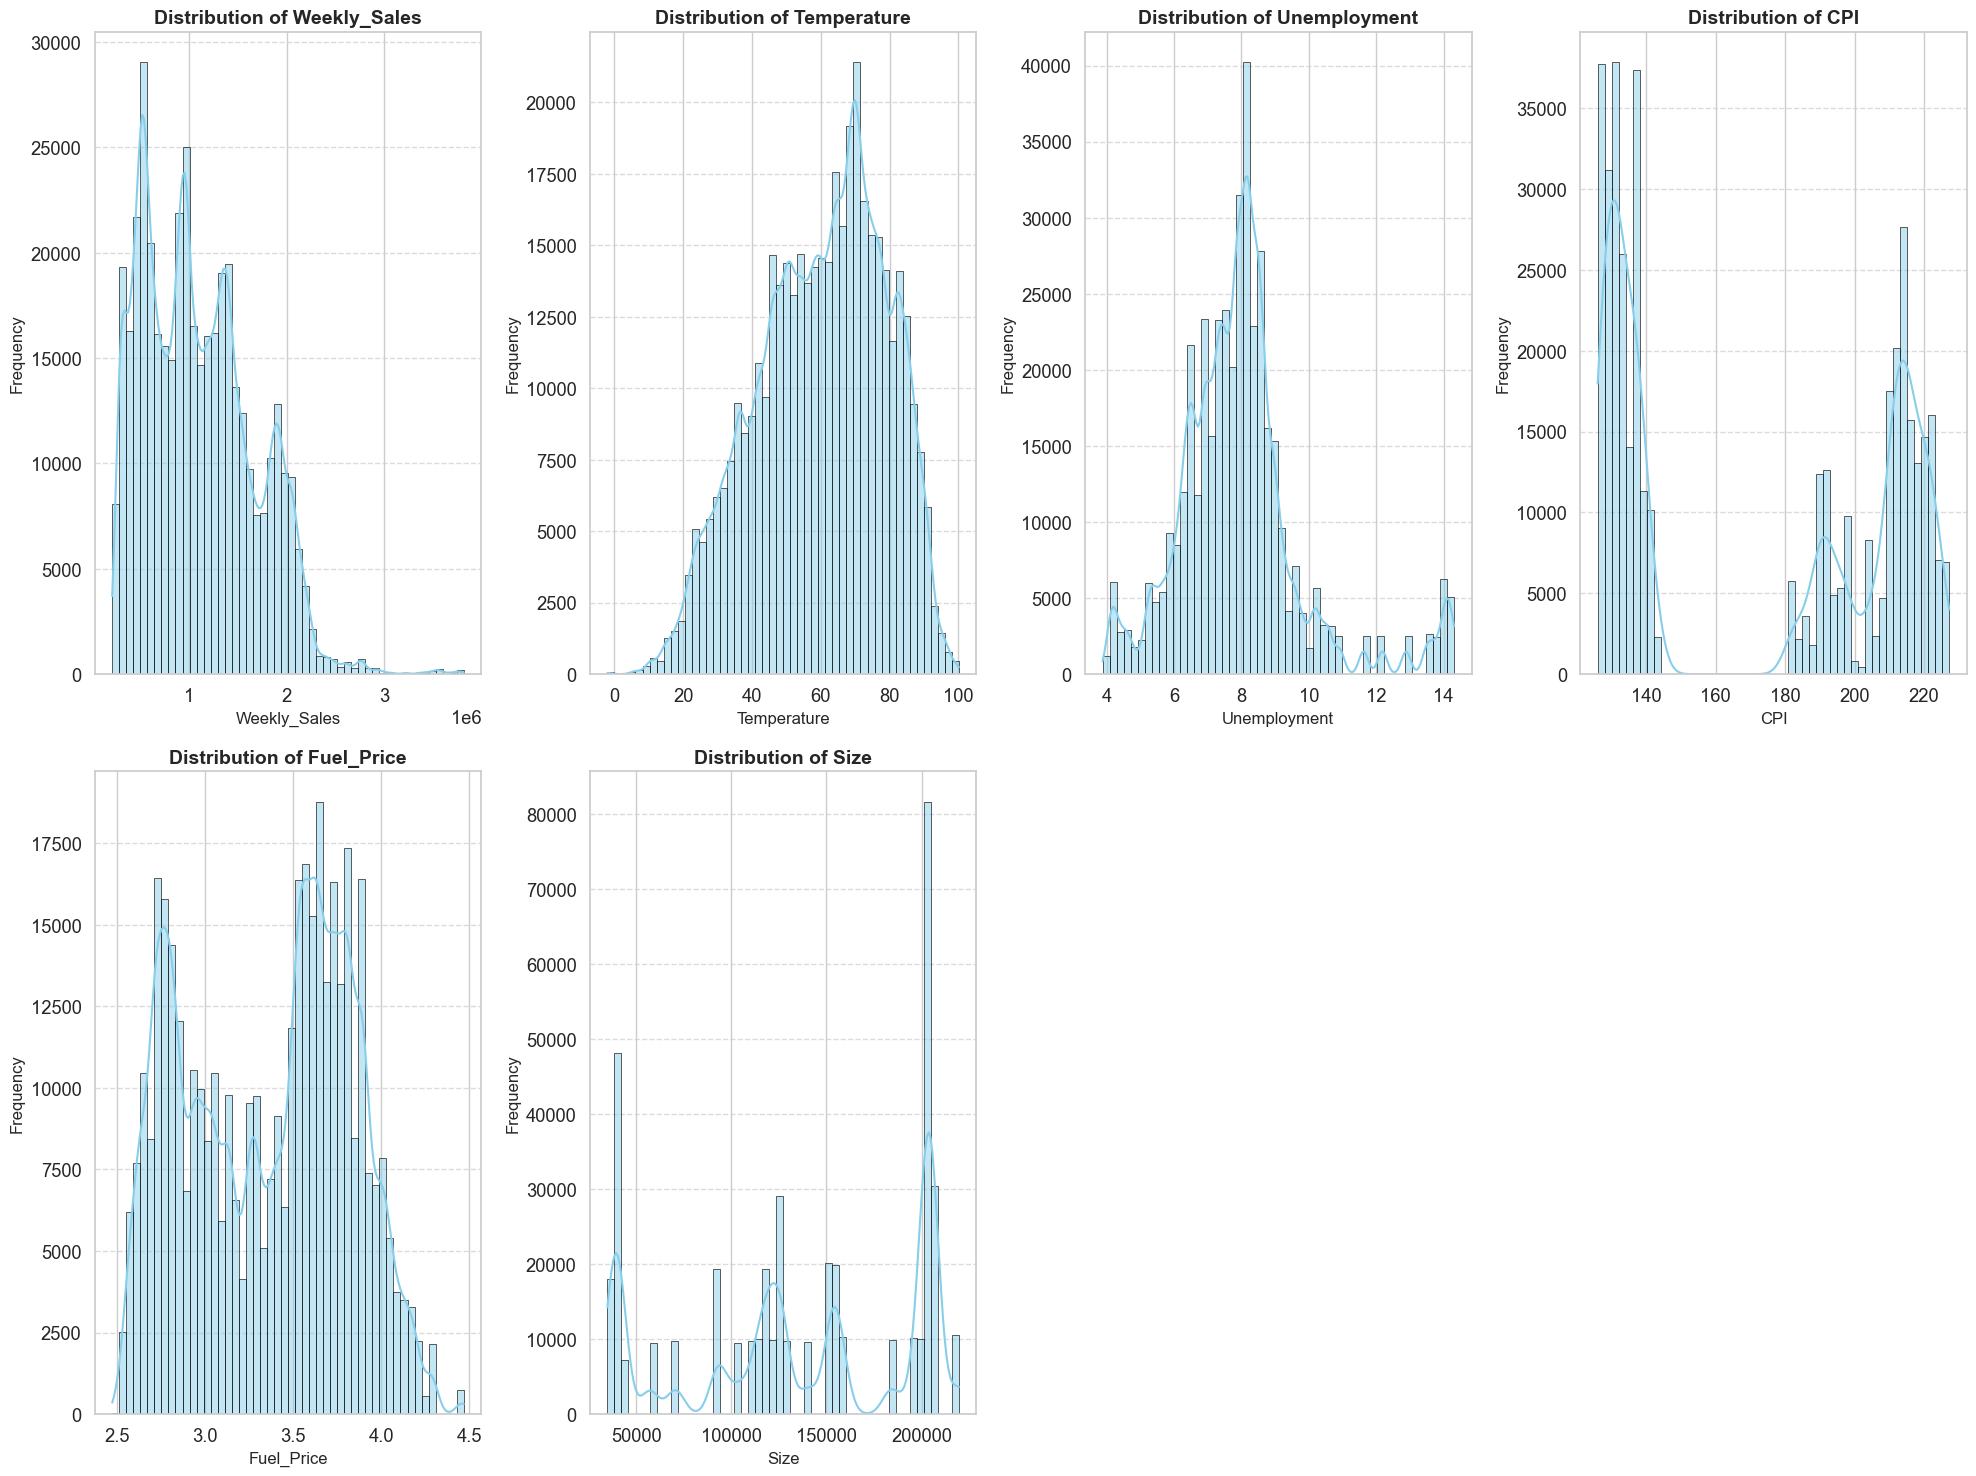

In [26]:
# Set the style for the plots# Set the style for the plots# Set the style for the plots
# Set the style for the plots
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Define the columns to plot
columns = ['Weekly_Sales', 'Temperature', 'Unemployment', 'CPI', 'Fuel_Price', 'Size']

# Function to plot histograms in a 4x4 matrix layout
def plot_histograms_matrix(df, cols, bins=50):
    num_cols = 4
    num_rows = (len(cols) + num_cols - 1) // num_cols  # Calculate the number of rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cols):
        sns.histplot(df[col].dropna(), bins=bins, kde=True, color="skyblue", edgecolor="black", ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function to plot histograms
plot_histograms_matrix(dataset, columns)

# 🧰BoxPlot

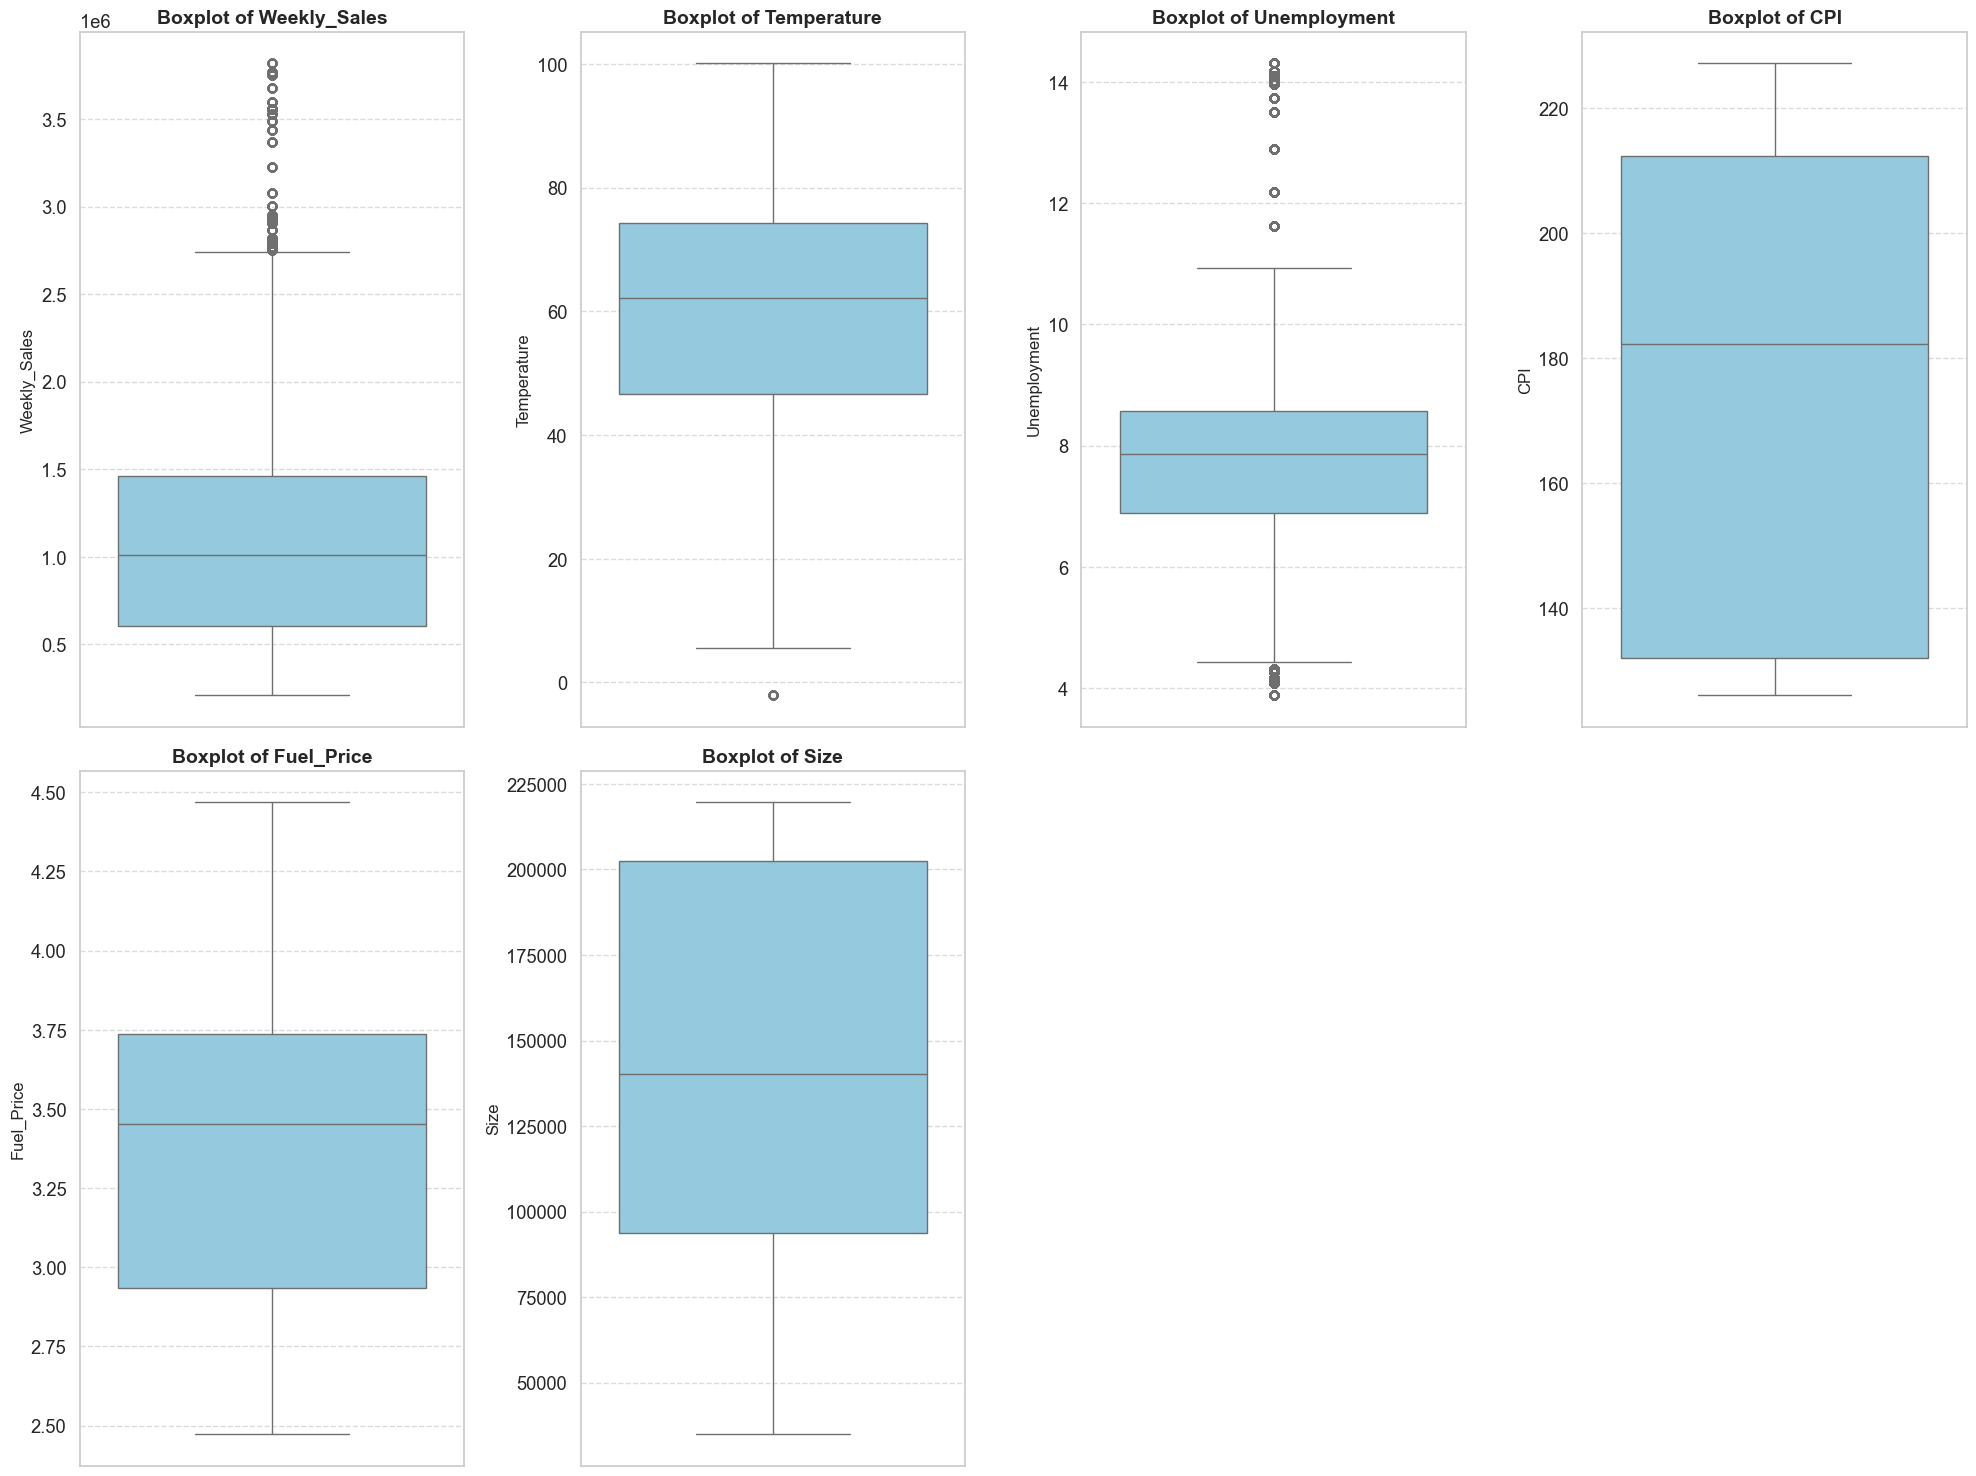

In [27]:
# Define the columns to plot
columns = ['Weekly_Sales', 'Temperature', 'Unemployment', 'CPI', 'Fuel_Price', 'Size']

# Function to plot boxplots in a 4x4 matrix layout
def plot_boxplots_matrix(df, cols):
    num_cols = 4
    num_rows = (len(cols) + num_cols - 1) // num_cols  # Calculate the number of rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cols):
        sns.boxplot(data=df, y=col, ax=axes[i], color="skyblue")
        axes[i].set_title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
        axes[i].set_ylabel(col, fontsize=12)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function to plot boxplots
plot_boxplots_matrix(dataset, columns)


# 🎻Violin Plot

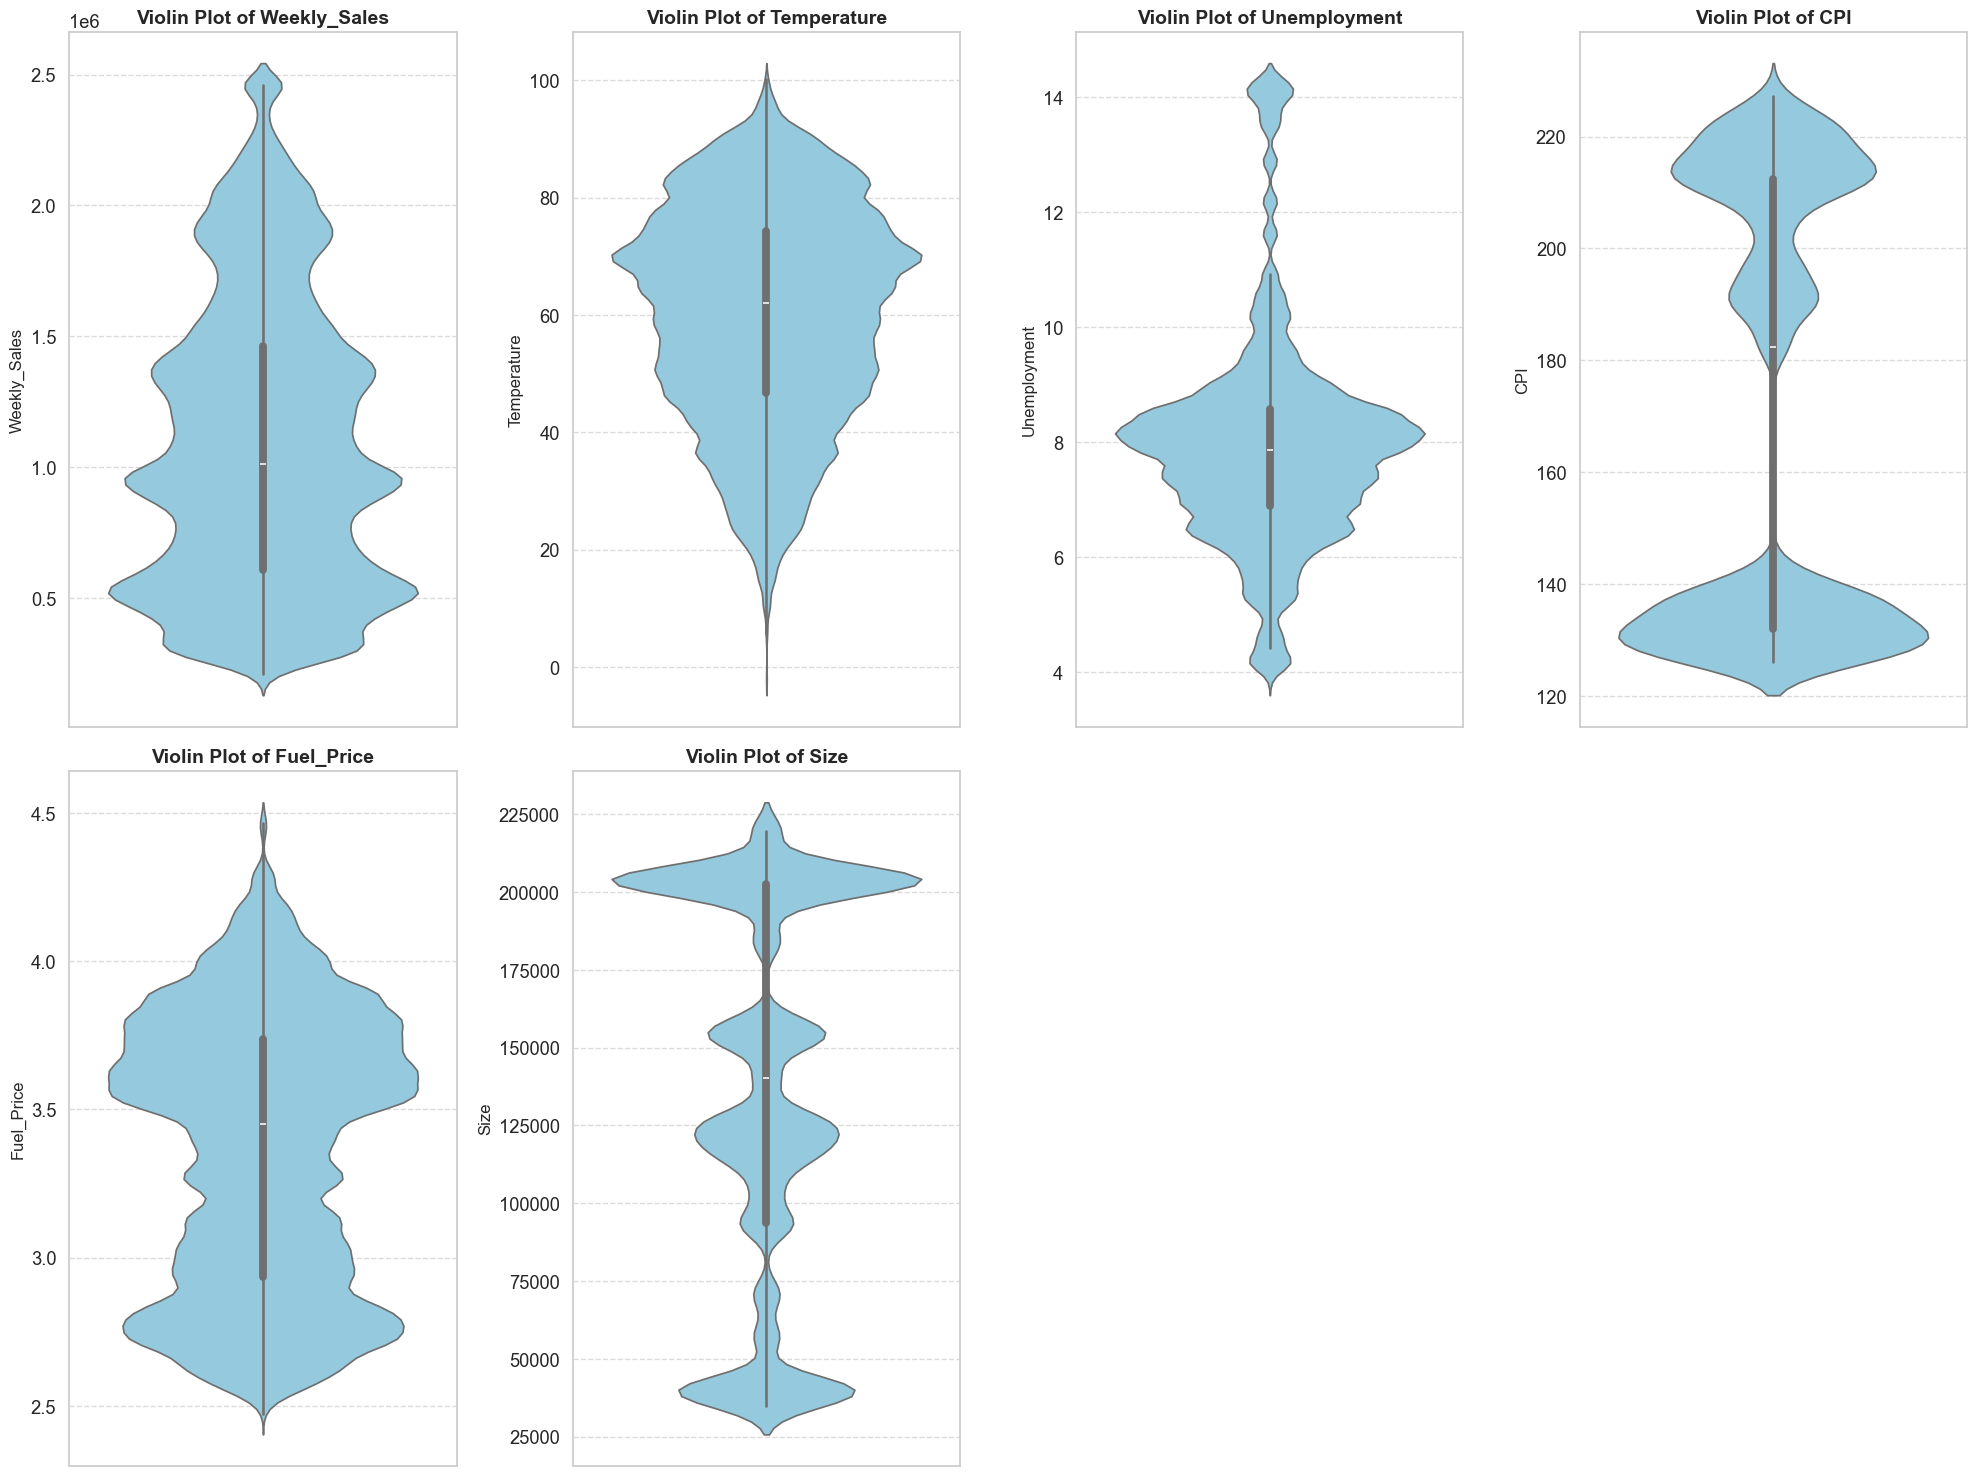

In [34]:
# Define the columns to plot
columns = ['Weekly_Sales', 'Temperature', 'Unemployment', 'CPI', 'Fuel_Price', 'Size']

# Function to plot violin plots in a 4x4 matrix layout
def plot_violinplots_matrix(df, cols):
    num_cols = 4
    num_rows = (len(cols) + num_cols - 1) // num_cols  # Calculate the number of rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cols):
        sns.violinplot(data=df, y=col, ax=axes[i], color="skyblue")
        axes[i].set_title(f'Violin Plot of {col}', fontsize=14, fontweight='bold')
        axes[i].set_ylabel(col, fontsize=12)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function to plot violin plots
plot_violinplots_matrix(dataset, columns)

## Handling Outliers

In [28]:
def cap_outliers(data, col, upper_percentile=0.99):
    upper_cap = data[col].quantile(upper_percentile)
    data[col] = data[col].apply(lambda x: min(x, upper_cap))
    return data


In [29]:
data = cap_outliers(dataset, 'Weekly_Sales', 0.99)


### Oultiers After Handling

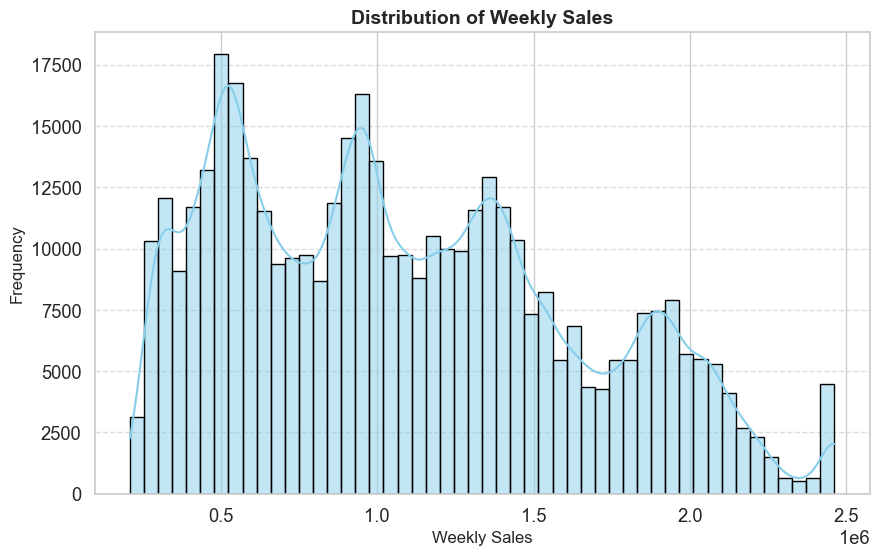

In [33]:
#Visualizing the Distribution of weekly sales after caping outliers in weeklySales
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], bins=50, kde=True, color="skyblue", edgecolor="black")
plt.title('Distribution of Weekly Sales', fontsize=14, fontweight='bold')
plt.xlabel('Weekly Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 📌 Outlier Handling Summary

We conducted outlier detection and designed a thoughtful strategy based on domain insight and data distribution. Here's a summary of findings and decisions:

## 🔍 Columns Analyzed

- `Weekly_Sales`  
- `Temperature`  
- `Unemployment`
- `CPI`  
- `Size`  
- `Fuel_price` 



## 📊 Visualizations Used

To understand the data distribution and outliers, the following plots were generated:

- 📊 **Histograms** — to assess overall distribution and skewness  
- 🧰 **Boxplots** — to detect outliers using IQR method
- 🎻 **Violin** —  shows the distribution of a numeric variable

## 🧠 Outlier Handling Strategy

| Feature         | Outliers | Insight                                                                                   | Decision                       |
|-----------------|----------|-------------------------------------------------------------------------------------------|--------------------------------|
| **Unemployment**| 32,114   | Max (14.31) slightly above upper bound (11.09) but realistic.                             | Keep                           |
| **CPI**         | 0        | No outliers.                                                                              | Keep                           |
| **Fuel_Price**  | 0        | No outliers.                                                                              | Keep                           |
| **Temperature** | 69       | Min (-2.06°F) and max (100.14°F) plausible.                                               | Keep                           |
| **Size**        | 0        | No outliers.                                                                              | Keep                           |
| **Weekly_Sales**| 2,179    | Max (~3.8M) far above IQR upper bound (~2.75M); may reflect real spikes.                  | capping                        |

## ✨ Final Strategy

- ✅ **Keep without modification**:  
  `Unemployment`, `Temperature`, `CPI`, `Fuel_Price`, `Size`

- 🟡 **Cap**:  
  `Weekly_Sales` 
  *→ Consider using 95th–99th percentile capping*


---

# 🧹Generating Cleaned DataSet

In [35]:
# Dropping unnecessary columns
columns_to_drop = ['Date','IsHoliday']
dataset.drop(columns=columns_to_drop, inplace=True)

In [36]:
dataset.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'Month', 'Year',
       'WeekOfYear', 'Quarter', 'Season', 'IsPromoWeek'],
      dtype='object')

In [38]:
dataset.to_csv('E:/IBM Data Scientiest/Graduation Project/MileStone1/walmart_cleaned.csv', index=False)